## 라이브러리 로드

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [29]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [30]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [32]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [33]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.689453,17.987795
std,218.081158,96.759853,1713.600342,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


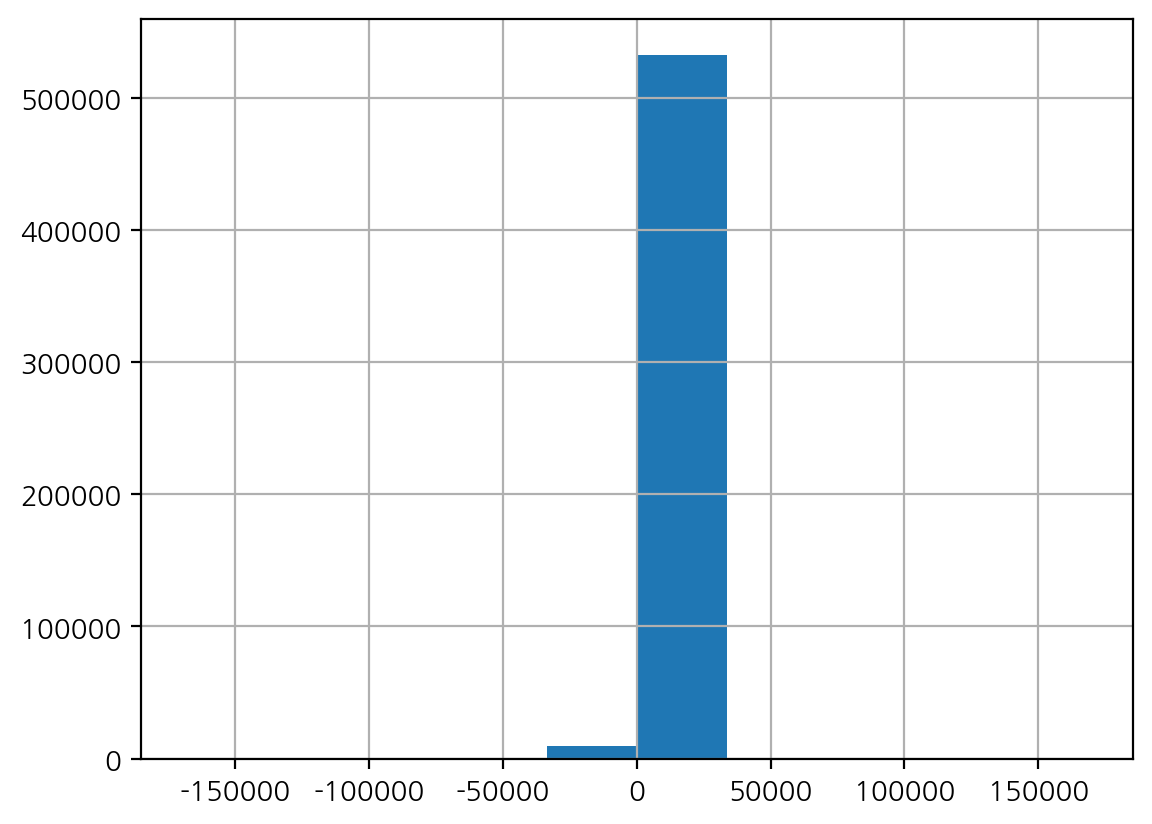

In [34]:
# 0 미만의 값이 있다는 것이 확인
df['TotalPrice'].hist();

In [35]:
# df['TotalPrice'] = df[(df['TotalPrice'] > 0) & (df['TotalPrice'] < 10000)]['TotalPrice']
# df

In [36]:
df_sample = df.sample(n=1000, random_state=42)
df_sample

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,20.40
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,27.80
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2.60
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,5.85
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,19.90
...,...,...,...,...,...,...,...,...,...
43603,540098,21977,PACK OF 60 PINK PAISLEY CAKE CASES,1,2011-01-04 15:50:00,0.55,16241.0,United Kingdom,0.55
421387,572964,22175,PINK OWL SOFT TOY,6,2011-10-27 10:41:00,2.95,12630.0,Finland,17.70
61634,541434,C2,CARRIAGE,1,2011-01-18 10:22:00,50.00,14911.0,EIRE,50.00
357609,568101,22950,36 DOILIES VINTAGE CHRISTMAS,24,2011-09-23 15:21:00,1.45,15978.0,United Kingdom,34.80


In [37]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 209268 to 352115
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   InvoiceNo    1000 non-null   category
 1   StockCode    1000 non-null   category
 2   Description  998 non-null    category
 3   Quantity     1000 non-null   int32   
 4   InvoiceDate  1000 non-null   category
 5   UnitPrice    1000 non-null   float64 
 6   CustomerID   750 non-null    float32 
 7   Country      1000 non-null   category
 8   TotalPrice   1000 non-null   float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 2.2 MB


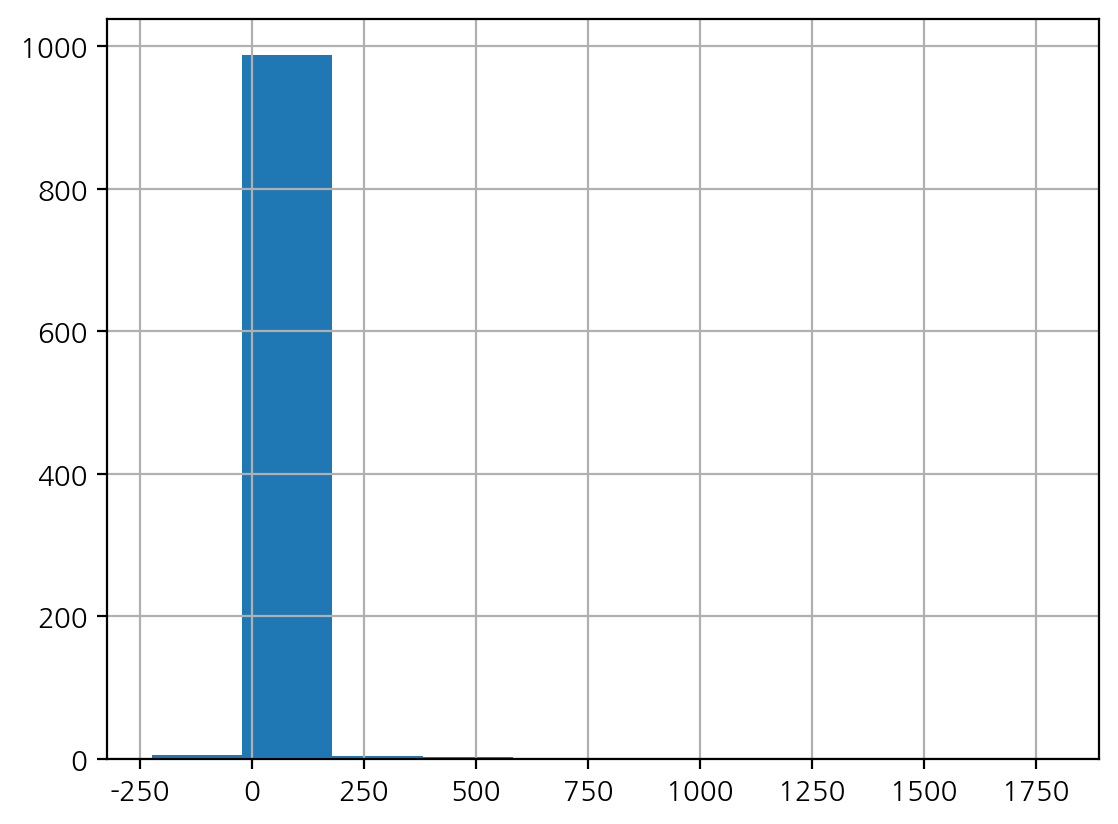

In [38]:

df_sample['TotalPrice'].hist();

In [39]:
# 모집단의 TotalPrice에 대한 표준편차와 평균
total_std = df['TotalPrice'].std()
total_mean = df['TotalPrice'].mean()

# 표본의 TotalPrice에 대한 표준편차와 평균
sample_std = df_sample['TotalPrice'].std()
sample_mean = df_sample['TotalPrice'].mean()


print(f'모집단 표준편차: {total_std}')
print(f'모집단 평균: {total_mean}')
print('----------------------------------')
print(f'표본 표준편차: {sample_std}')
print(f'표본 평균: {sample_mean}')

모집단 표준편차: 378.8108235059747
모집단 평균: 17.98779487699964
----------------------------------
표본 표준편차: 64.46732773087356
표본 평균: 16.832069999999998


모집단과 표본의 평균 차이: 모집단의 'TotalPrice'에 대한 평균은 약 17.99이고, 표본의 'TotalPrice'에 대한 평균은 약 16.83입니다. 이는 표본이 모집단 평균과 다를 수 있다는 것을 나타냅니다. 표본이 모집단을 대표할 수 있지만, 무작위 추출에 의해 평균이 다를 수 있습니다.<br>

모집단과 표본의 표준편차 차이: 모집단의 'TotalPrice'에 대한 표준편차는 약 378.81이고, 표본의 'TotalPrice'에 대한 표준편차는 약 64.47입니다.  모집단 보다 표본의 데이터가 변량들의 거리가 가깝다는 것을 알 수 있습니다..표본의 표준편차가 모집단 표준편차보다 작지만, 이는 표본의 크기가 작아서 발생한 현상일 수 있습니다.<br>


중심극한정리에 따르면, 충분히 큰 표본의 표본 평균은 정규분포를 따르게 됩니다. 이 예에서는 표본 크기가 1000으로 크게는 볼 수 있지만, 표본 평균의 표준편차가 모집단 표준편차보다 작게 나타납니다. 이는 중심극한정리에 따라 표본 평균들이 정규분포에 가까워진다는 것을 나타냅니다.

따라서, 중심극한정리는 표본 평균이 모집단 평균 주변에 집중되어 있을 가능성을 제시하며, 이를 통해 통계적 추론이 가능하다는 것을 보여줍니다.

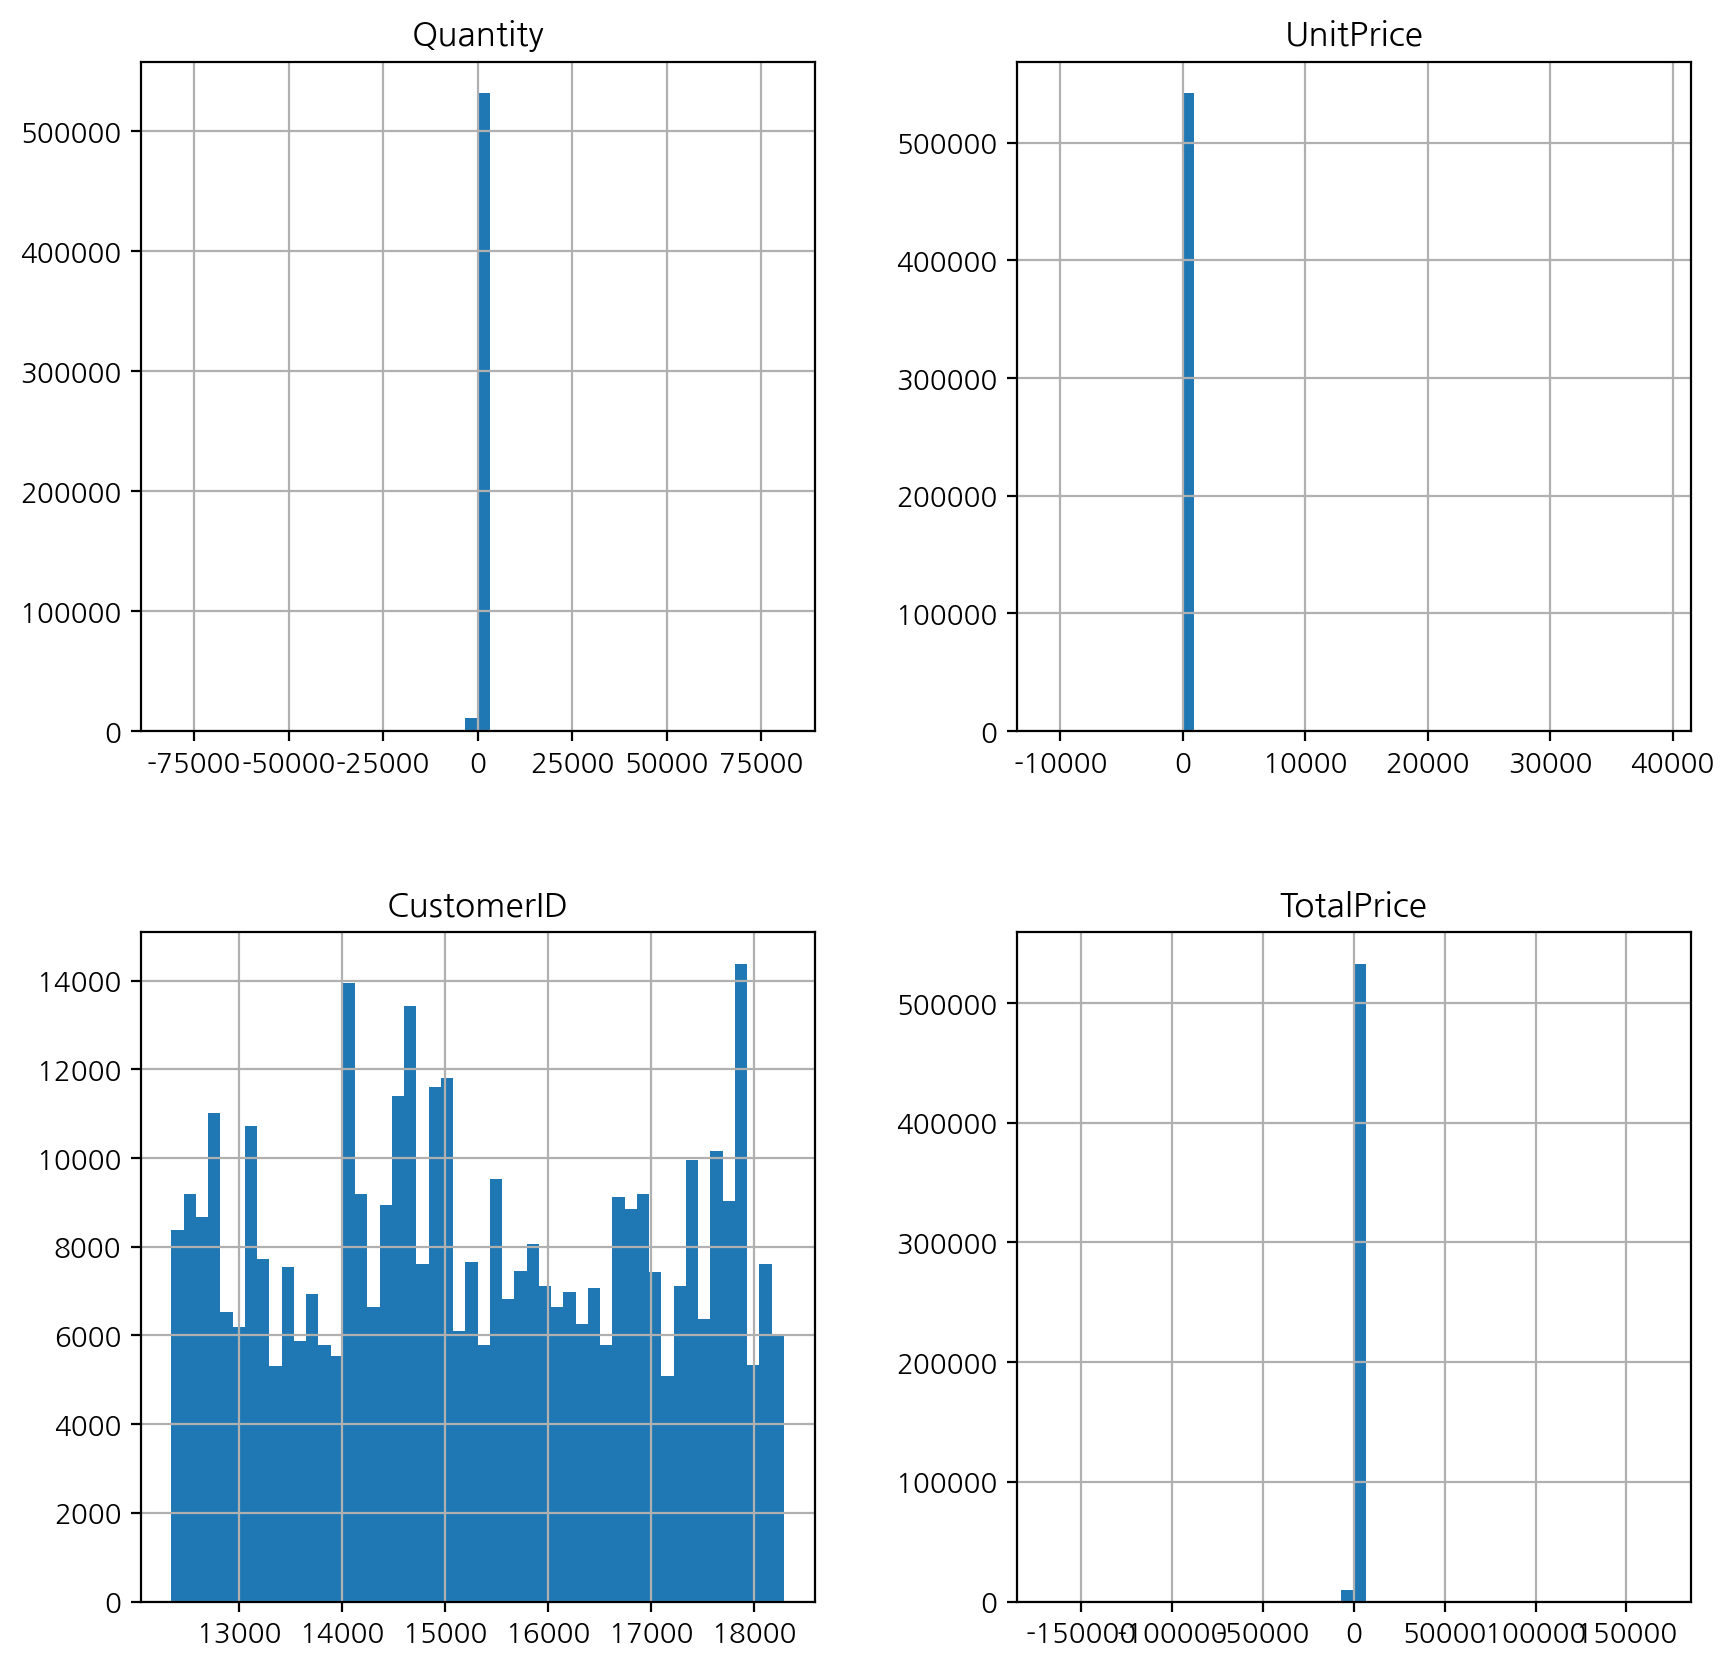

In [40]:
df.hist(bins=50, figsize=(10,10));

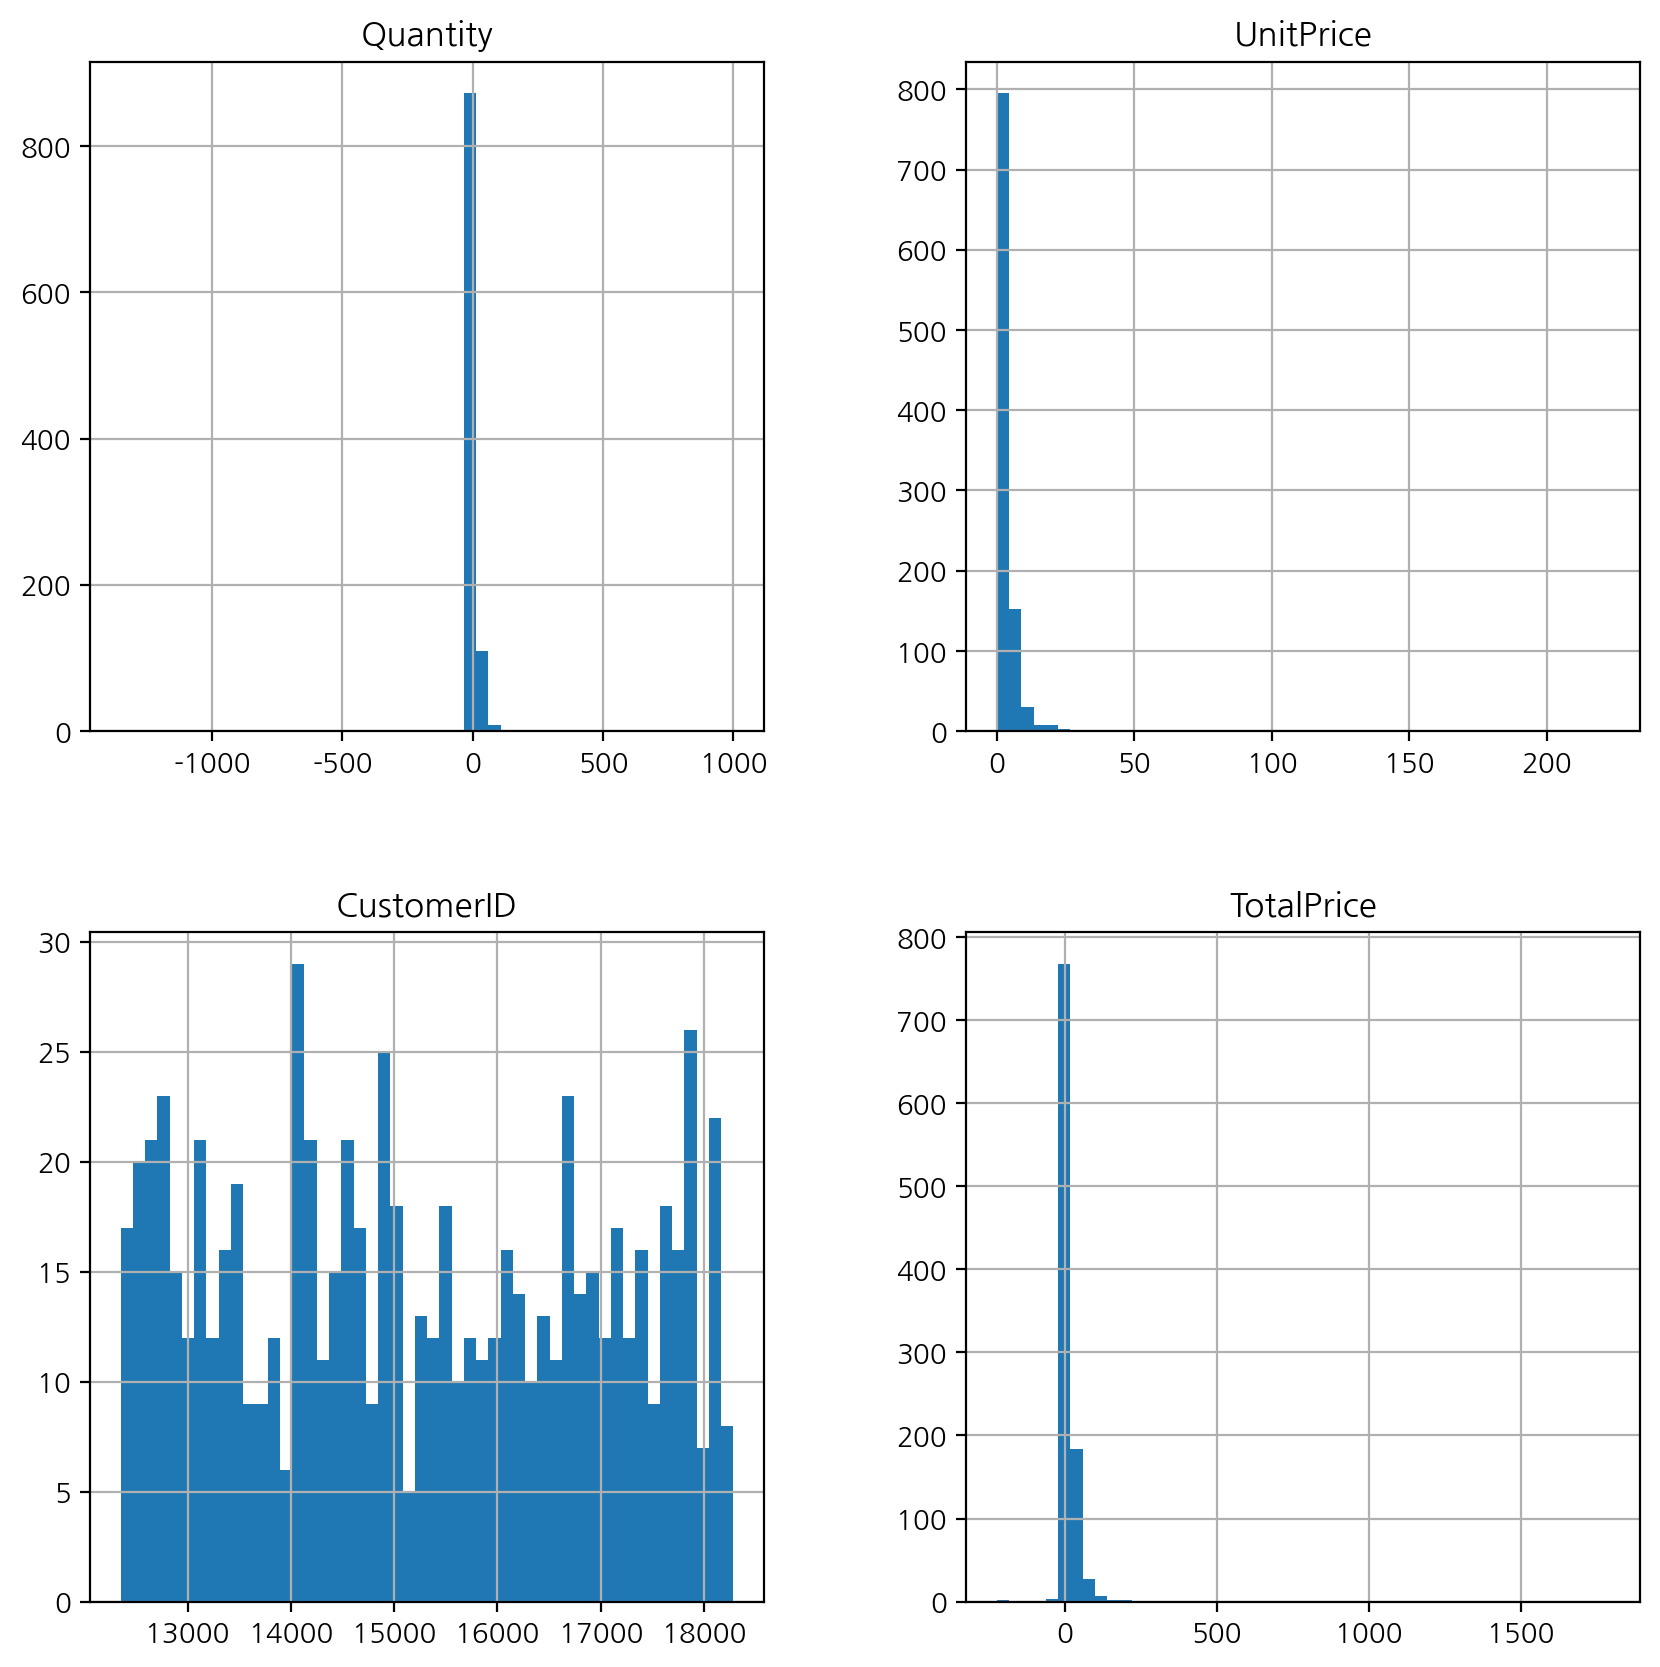

In [41]:
df_sample.hist(bins=50, figsize=(10,10));

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [42]:
from scipy.stats import ttest_ind

In [43]:
data = df[['TotalPrice','Country']]

# 가장 많은 사우이 두 국가
top_countries = data['Country'].value_counts().head(2).index
country1, country2 = top_countries[0], top_countries[1]
print(country1,',', country2)

United Kingdom , Germany


In [44]:
# 각 국가의 'TotalPrice' 평균
mean_country1 = data[data['Country'] == country1]['TotalPrice'].mean()
mean_country2 = data[data['Country'] == country2]['TotalPrice'].mean()

print(mean_country1,',', mean_country2)

16.525065419655366 , 23.348942601369142


In [45]:
# 독립표본 t-검정
uk = data[data['Country'] == country1]['TotalPrice']
gm = data[data['Country'] == country2]['TotalPrice']
t_stat, p_value = ttest_ind(uk, gm, equal_var=False)

t_stat, p_value

# t-통계량은 유의미 하다는 것을 확인함
# 현재 음수이므로 gm의 평균값이 uk 평균값보다 작다는것을 나타냄

(-10.046360185819829, 9.823416115791871e-24)

In [46]:
# 1종 오류 (False Positive): 두 국가 간의 'TotalPrice' 평균에 차이가 없는데, 통계적으로 유의미한 차이가 있다고 잘못 결론 내리는 경우입니다. 여기서는 p-값이 매우 작아 귀무가설을 기각하였으므로 1종 오류는 발생하지 않았습니다.

# 2종 오류 (False Negative): 두 국가 간의 'TotalPrice' 평균에 차이가 있는데, 통계적으로 유의미한 차이가 없다고 잘못 결론 내리는 경우입니다. 이는 검정력(Statistical Power)와 관련이 있으며, 측정이나 표본 크기를 늘리면 2종 오류를 줄일 수 있습니다.

# # 결과 출력
print(f"국가 '{country1}'의 'TotalPrice' 평균: {mean_country1}")
print(f"국가 '{country2}'의 'TotalPrice' 평균: {mean_country2}")
print('--------------------------------------')
print(f"독립표본 t-검정 결과 - t-statistic: {t_stat}, p-value: {p_value}")

# 결과 해석
print('----------------------------------')
if p_value < 0.05:
    print("통계적으로 유의미한 차이가 있음")
else:
    print("통계적으로 유의미한 차이가 없음")

국가 'United Kingdom'의 'TotalPrice' 평균: 16.525065419655366
국가 'Germany'의 'TotalPrice' 평균: 23.348942601369142
--------------------------------------
독립표본 t-검정 결과 - t-statistic: -10.046360185819829, p-value: 9.823416115791871e-24
----------------------------------
통계적으로 유의미한 차이가 있음


## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [47]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

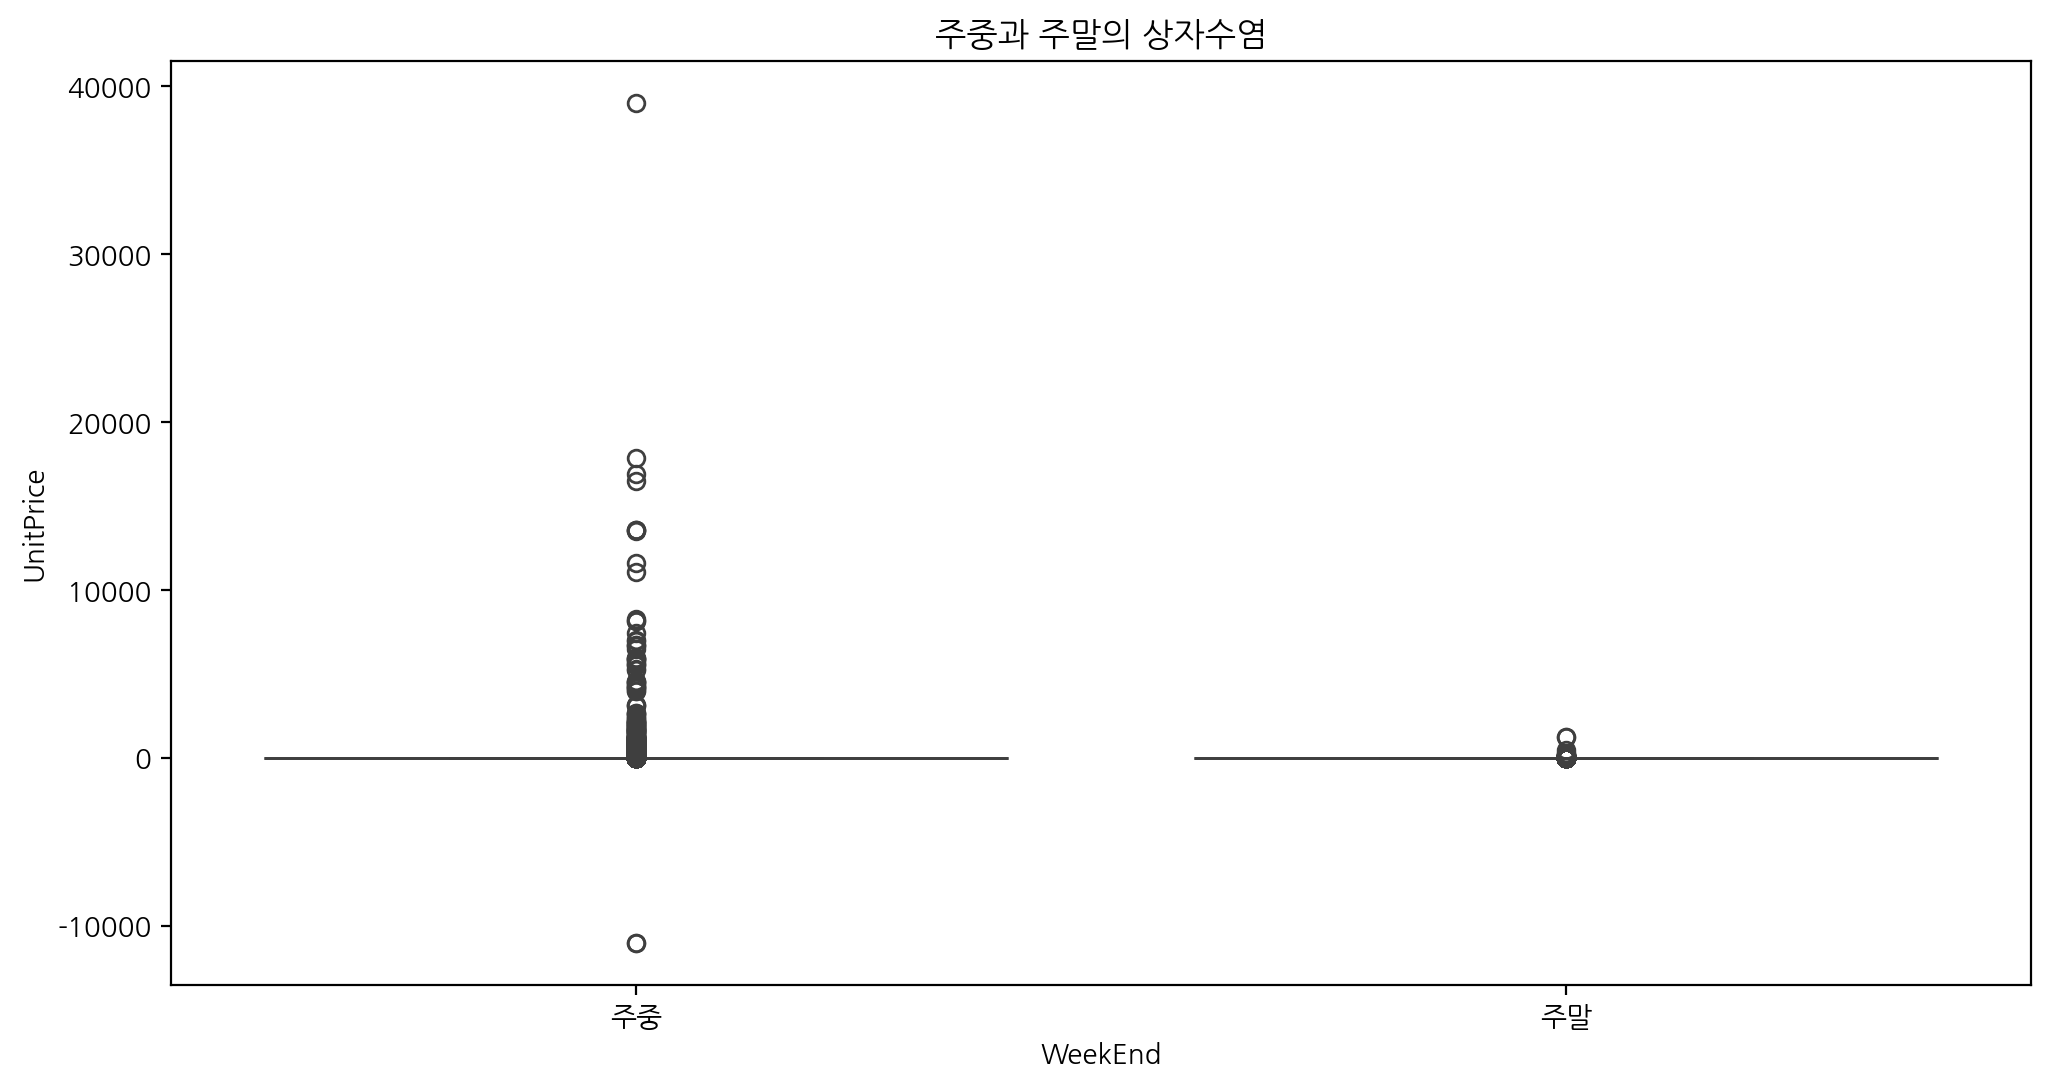

In [48]:
# 상자수염
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='WeekEnd', y='UnitPrice')
plt.title('주중과 주말의 상자수염')
plt.show()

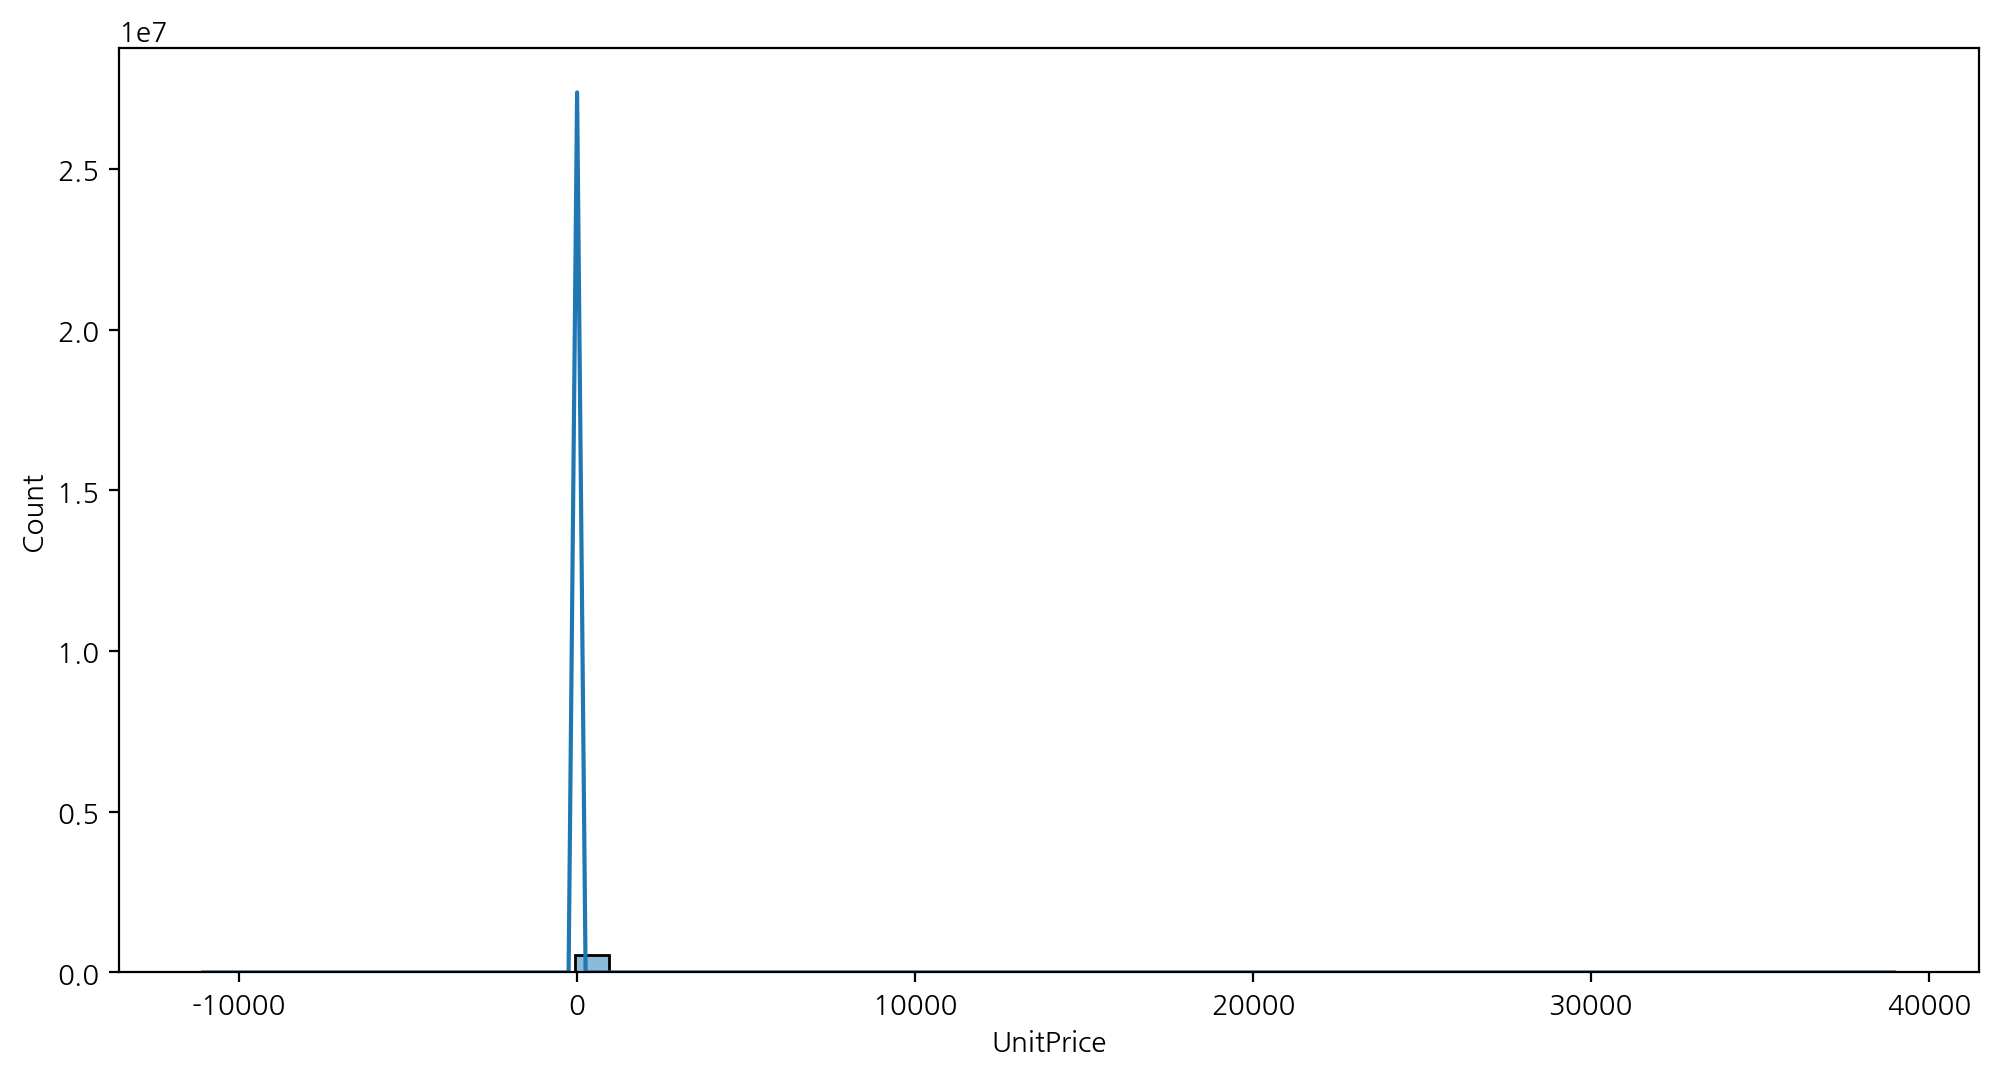

In [49]:
# 히스토그램
plt.figure(figsize=(12,6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.xlabel('UnitPrice')
plt.show()

In [50]:
# 주중과 주말의 분위수, 중심경향치, 변산성 계산
quantiles_weekday = weekday_data['UnitPrice'].quantile([0.25, 0.75])
quantiles_weekend = weekend_data['UnitPrice'].quantile([0.25, 0.75])

mean_weekday = weekday_data['UnitPrice'].mean()
median_weekday = weekday_data['UnitPrice'].median()
std_weekday = weekday_data['UnitPrice'].std()
var_weekday = weekday_data['UnitPrice'].var()

mean_weekend = weekend_data['UnitPrice'].mean()
median_weekend = weekend_data['UnitPrice'].median()
std_weekend = weekend_data['UnitPrice'].std()
var_weekend = weekend_data['UnitPrice'].var()

# 결과 출력
print("주중 'UnitPrice' 통계량:")
print(f"  1사분위수: {quantiles_weekday[0.25]}")
print(f"  3사분위수: {quantiles_weekday[0.75]}")
print(f"  평균값: {mean_weekday}")
print(f"  중앙값: {median_weekday}")
print(f"  표준편차: {std_weekday}")
print(f"  분산: {var_weekday}\n")

print("주말 'UnitPrice' 통계량:")
print(f"  1사분위수: {quantiles_weekend[0.25]}")
print(f"  3사분위수: {quantiles_weekend[0.75]}")
print(f"  평균값: {mean_weekend}")
print(f"  중앙값: {median_weekend}")
print(f"  표준편차: {std_weekend}")
print(f"  분산: {var_weekend}")

주중 'UnitPrice' 통계량:
  1사분위수: 1.25
  3사분위수: 4.13
  평균값: 4.843425333065292
  중앙값: 2.1
  표준편차: 103.03205776163102
  분산: 10615.604926596072

주말 'UnitPrice' 통계량:
  1사분위수: 1.25
  3사분위수: 3.75
  평균값: 2.8878244815533978
  중앙값: 1.85
  표준편차: 7.959497387498765
  분산: 63.35359866159967


주중 'UnitPrice'의 통계량을 살펴보면, 중앙값이 2.1로 나타나 있습니다. 그러나 평균이 중앙값보다 훨씬 크게 나타납니다. 이는 데이터의 오른쪽 꼬리가 길어서 평균이 영향을 받았을 가능성이 있습니다. 표준편차도 크게 나타나 있어 데이터가 퍼져있음을 나타냅니다.
주말 'UnitPrice'의 통계량에서는 평균과 중앙값이 비슷하게 나타나 있습니다. 표준편차도 작아졌고, 데이터가 평균 주변에 집중되어 있음을 나타냅니다.
<br>

'UnitPrice'의 주중과 주말의 데이터 분포가 서로 다릅니다.
주중에는 데이터가 평균 주변에 집중되어 있지 않습니다.상품이 높은 가격대에 판매되고 있다는 것을 시사할 수 있습니다.
반면, 주말에는 데이터가 평균 주변에 더 집중되어 있어 일반적으로 주말에는 높은 가격의 상품이 적다고 볼 수 있습니다.

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [51]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [52]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,주중
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,주중
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,주중
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,주중
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,주중


In [53]:
df_sample['TotalPrice'] = df_sample['Quantity'] * df_sample['UnitPrice']

In [54]:
statistic, p_value = mannwhitneyu(df['TotalPrice'],df_sample['TotalPrice'] )

print(f'u검정 결과 u-통계량: {statistic}, p_value:{p_value:.4f}')

u검정 결과 u-통계량: 270727342.0, p_value:0.9634


In [55]:
if p_value < 0.05:
    print("통계적으로 유의미한 차이가 있음")
else:
    print("통계적으로 유의미한 차이가 없음")


# 귀무가설: 'TotalPrice'의 중간값이 특정 값과 같다
# 대립가설: 'TotalPrice'의 중간값이 특정 값과 같지 않다.

# U-통계량: 270727342.0
# p-value: 0.9634

#
# p-value가 0.9634로 유의수준 0.05보다 크기 때문에 귀무가설을 기각할 충분한 통계적 증거가 없습니다.
# 따라서, 'TotalPrice'의 중앙값이 특정 값과 다르다는 통계적인 증거는 부족합니다.

# 비즈니스 관점에서의 분석:

# 주어진 데이터로 보아 'TotalPrice'의 중앙값은 특정 값과 통계적으로 유의미한 차이가 없습니다.
# 이는 'TotalPrice'가 특정 값에 대해 중앙값을 가지고 있지 않다는 것을 시사합니다.
# 해당 결과는 'TotalPrice'의 중앙값이 예상과 다르다거나 특이점이 있다는 증거가 부족하다는 것을 의미할 수 있습니다.

통계적으로 유의미한 차이가 없음


## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [56]:
from scipy import stats


In [57]:
# 신뢰구간
unitprice_data = df['UnitPrice']
confidence_level = 0.95
n = len(unitprice_data)
mean_unitprice = np.mean(unitprice_data)
std_unitprice = np.std(unitprice_data, ddof=1)

In [58]:
# t_critical
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

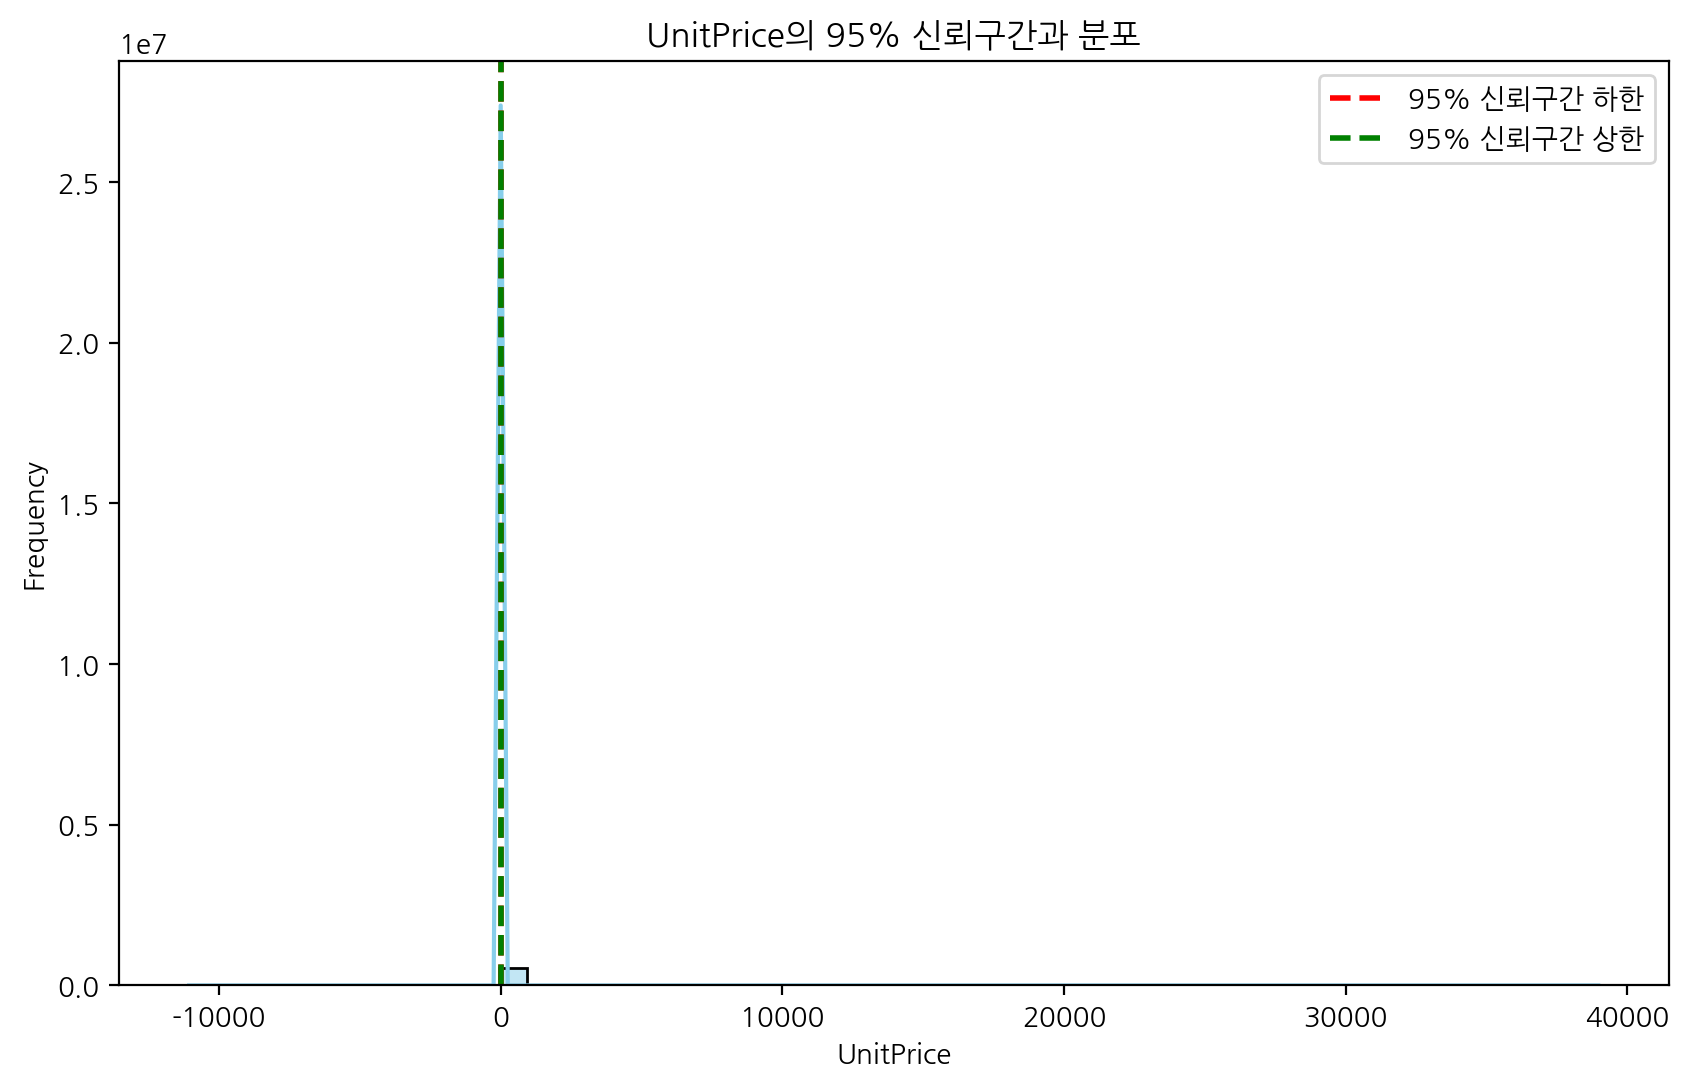

In [59]:
# 신뢰구간 계산
margin_of_error = t_critical * (std_unitprice / np.sqrt(n))
confidence_interval = (mean_unitprice - margin_of_error, mean_unitprice + margin_of_error)

# Seaborn을 사용하여 신뢰구간 시각화
plt.figure(figsize=(10, 6))
sns.histplot(unitprice_data, bins=50, kde=True, color='skyblue')
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2, label='95% 신뢰구간 하한')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='95% 신뢰구간 상한')
plt.title('UnitPrice의 95% 신뢰구간과 분포')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()